In [96]:
import numpy as np
import torch
import pandas as pd
import json
from random import shuffle
from torch.nn.functional import cosine_similarity
cosine = lambda *args: cosine_similarity(*args, dim=0).item()

In [97]:
whisper_embeds_path = '../data/whisper_embeds/whisper_embeds.pt'
tira_embed_path = '../data/whisper_embeds/tira-asr-orig-test.pt'
tira_embed_1k = '../data/whisper_embeds/tira-1k-hf-train.pt'
tira_embed_1k_concat = '../data/whisper_embeds/tira-concat-1k-hf-train.pt'

In [98]:
whisper_embeds = torch.load(whisper_embeds_path)
whisper_embeds.keys()

dict_keys(['fleurs-it_it-test.pt', 'fleurs-lt_lt-test.pt', 'fleurs-hu_hu-test.pt', 'fleurs-nb_no-test.pt', 'fleurs-fr_fr-test.pt', 'fleurs-tr_tr-test.pt', 'fleurs-ln_cd-test.pt', 'fleurs-az_az-test.pt', 'fleurs-uz_uz-test.pt', 'fleurs-kk_kz-test.pt', 'fleurs-ar_eg-test.pt', 'fleurs-km_kh-test.pt', 'fleurs-el_gr-test.pt', 'fleurs-te_in-test.pt', 'fleurs-sw_ke-test.pt', 'fleurs-hi_in-test.pt', 'fleurs-sk_sk-test.pt', 'fleurs-mk_mk-test.pt', 'fleurs-sn_zw-test.pt', 'fleurs-fi_fi-test.pt', 'fleurs-mr_in-test.pt', 'fleurs-ca_es-test.pt', 'fleurs-fa_ir-test.pt', 'fleurs-as_in-test.pt', 'fleurs-hy_am-test.pt', 'fleurs-ro_ro-test.pt', 'fleurs-lb_lu-test.pt', 'fleurs-mn_mn-test.pt', 'fleurs-oc_fr-test.pt', 'fleurs-bg_bg-test.pt', 'fleurs-et_ee-test.pt', 'fleurs-vi_vn-test.pt', 'fleurs-sd_in-test.pt', 'fleurs-ur_pk-test.pt', 'fleurs-ps_af-test.pt', 'fleurs-es_419-test.pt', 'fleurs-ne_np-test.pt', 'fleurs-lv_lv-test.pt', 'fleurs-bn_in-test.pt', 'fleurs-tg_tj-test.pt', 'fleurs-ka_ge-test.pt', 'fle

In [99]:
tira_embeds = torch.load(tira_embed_1k_concat)#whisper_embeds['tira-asr-orig-test.pt']
tira_embeds.shape

torch.Size([1280])

In [100]:
whisper_embeds['tira']=tira_embeds
whisper_embeds.pop('tira-asr-orig-test.pt', None)

tensor([ 0.4284, -0.8002,  0.1050,  ..., -0.1635, -0.2039,  0.7403])

In [101]:
cos_sim = []
langs = list(whisper_embeds.keys())
shuffle(langs)
embeds = []
for lang in langs:
    cos_sim.append(cosine(whisper_embeds[lang], tira_embeds))
    embeds.append(whisper_embeds[lang])
cos_sim[:5], max(cos_sim)

([-0.02192903310060501,
  -0.018429117277264595,
  -0.018222875893115997,
  -0.017916398122906685,
  -0.017385173588991165],
 1.0000001192092896)

In [102]:
df=pd.DataFrame({'embeds_file': langs, 'cos_sim': cos_sim})
df.head()

,embeds_file,cos_sim
0,fleurs-ro_ro-test.pt,-0.021929
1,fleurs-he_il-test.pt,-0.018429
2,fleurs-cs_cz-test.pt,-0.018223
3,fleurs-lo_la-test.pt,-0.017916
4,fleurs-gl_es-test.pt,-0.017385


In [103]:
lang_code = df['embeds_file'].apply(lambda s: s.replace('fleurs-','').replace('-test.pt',''))
df['lang_code']=lang_code
df.head()

,embeds_file,cos_sim,lang_code
0,fleurs-ro_ro-test.pt,-0.021929,ro_ro
1,fleurs-he_il-test.pt,-0.018429,he_il
2,fleurs-cs_cz-test.pt,-0.018223,cs_cz
3,fleurs-lo_la-test.pt,-0.017916,lo_la
4,fleurs-gl_es-test.pt,-0.017385,gl_es


In [104]:
lang_code_path = '../meta/language_codes.json'
with open(lang_code_path) as f:
    lang_code_dict = json.load(f)
lang_code_dict.append({'fleurs': 'tira', 'whisper': 'tira'})
lang_code_dict

[{'iso2': 'en',
  'iso3': 'eng',
  'whisper': 'english',
  'fleurs': 'en_us',
  'fleurs_script': 'Latn'},
 {'iso2': 'de',
  'iso3': 'deu',
  'whisper': 'german',
  'fleurs': 'de_de',
  'fleurs_script': 'Latn'},
 {'iso2': 'es',
  'iso3': 'spa',
  'whisper': 'spanish',
  'fleurs': 'es_419',
  'fleurs_script': 'Latn'},
 {'iso2': 'ru',
  'iso3': 'rus',
  'whisper': 'russian',
  'fleurs': 'ru_ru',
  'fleurs_script': 'Cyrl'},
 {'iso2': 'ko',
  'iso3': 'kor',
  'whisper': 'korean',
  'fleurs': 'ko_kr',
  'fleurs_script': 'Hang'},
 {'iso2': 'fr',
  'iso3': 'fra',
  'whisper': 'french',
  'fleurs': 'fr_fr',
  'fleurs_script': 'Latn'},
 {'iso2': 'ja',
  'iso3': 'jpn',
  'whisper': 'japanese',
  'fleurs': 'ja_jp',
  'fleurs_script': ''},
 {'iso2': 'pt',
  'iso3': 'por',
  'whisper': 'portuguese',
  'fleurs': 'pt_br',
  'fleurs_script': 'Latn'},
 {'iso2': 'tr',
  'iso3': 'tur',
  'whisper': 'turkish',
  'fleurs': 'tr_tr',
  'fleurs_script': 'Latn'},
 {'iso2': 'pl',
  'iso3': 'pol',
  'whisper': 'p

In [105]:
code_to_lang = lambda lang_code: [lang['whisper'] for lang in lang_code_dict if lang['fleurs']==lang_code][0]
lang_names = df['lang_code'].apply(code_to_lang)
df['lang']=lang_names
df.head()

,embeds_file,cos_sim,lang_code,lang
0,fleurs-ro_ro-test.pt,-0.021929,ro_ro,romanian
1,fleurs-he_il-test.pt,-0.018429,he_il,hebrew
2,fleurs-cs_cz-test.pt,-0.018223,cs_cz,czech
3,fleurs-lo_la-test.pt,-0.017916,lo_la,lao
4,fleurs-gl_es-test.pt,-0.017385,gl_es,galician


In [106]:
df.sort_values('cos_sim', ascending=False)

,embeds_file,cos_sim,lang_code,lang
44,tira,1.000000,tira,tira
53,fleurs-mk_mk-test.pt,-0.010236,mk_mk,macedonian
15,fleurs-kk_kz-test.pt,-0.011230,kk_kz,kazakh
54,fleurs-et_ee-test.pt,-0.011429,et_ee,estonian
68,fleurs-ka_ge-test.pt,-0.011593,ka_ge,georgian
...,...,...,...,...
42,fleurs-az_az-test.pt,-0.020134,az_az,azerbaijani
40,fleurs-so_so-test.pt,-0.021343,so_so,somali
11,fleurs-id_id-test.pt,-0.021898,id_id,indonesian
0,fleurs-ro_ro-test.pt,-0.021929,ro_ro,romanian


In [107]:
lang_to_embeds_file = {}
add_pair = lambda r: lang_to_embeds_file.update({r['lang']:r['embeds_file']})
df.apply(add_pair, axis=1)
lang_to_embeds_file['tira']='tira'
lang_to_embeds_file

{'romanian': 'fleurs-ro_ro-test.pt',
 'hebrew': 'fleurs-he_il-test.pt',
 'czech': 'fleurs-cs_cz-test.pt',
 'lao': 'fleurs-lo_la-test.pt',
 'galician': 'fleurs-gl_es-test.pt',
 'portuguese': 'fleurs-pt_br-test.pt',
 'french': 'fleurs-fr_fr-test.pt',
 'welsh': 'fleurs-cy_gb-test.pt',
 'afrikaans': 'fleurs-af_za-test.pt',
 'vietnamese': 'fleurs-vi_vn-test.pt',
 'greek': 'fleurs-el_gr-test.pt',
 'indonesian': 'fleurs-id_id-test.pt',
 'maltese': 'fleurs-mt_mt-test.pt',
 'spanish': 'fleurs-es_419-test.pt',
 'slovak': 'fleurs-sk_sk-test.pt',
 'kazakh': 'fleurs-kk_kz-test.pt',
 'bosnian': 'fleurs-bs_ba-test.pt',
 'bulgarian': 'fleurs-bg_bg-test.pt',
 'bengali': 'fleurs-bn_in-test.pt',
 'javanese': 'fleurs-jv_id-test.pt',
 'hausa': 'fleurs-ha_ng-test.pt',
 'gujarati': 'fleurs-gu_in-test.pt',
 'ukrainian': 'fleurs-uk_ua-test.pt',
 'assamese': 'fleurs-as_in-test.pt',
 'latvian': 'fleurs-lv_lv-test.pt',
 'hungarian': 'fleurs-hu_hu-test.pt',
 'tajik': 'fleurs-tg_tj-test.pt',
 'finnish': 'fleurs-fi_

In [108]:
def compare_langs(lang1, lang2):
    embed1 = whisper_embeds[lang_to_embeds_file[lang1]]
    embed2 = whisper_embeds[lang_to_embeds_file[lang2]]
    return cosine(embed1, embed2)

compare_langs('punjabi', 'tira')

-0.01585371047258377

In [109]:
from scipy.spatial import distance_matrix
from scipy.spatial.distance import cosine, pdist, squareform
import seaborn
import matplotlib.pyplot as plt

In [110]:
dist_mat=squareform(pdist(embeds,cosine))
dist_mat.shape

(80, 80)

In [111]:
dist_df=pd.DataFrame(dist_mat, index=lang_names, columns=lang_names)
dist_df.head()

lang_code,romanian,hebrew,czech,lao,galician,portuguese,french,welsh,afrikaans,vietnamese,...,occitan,turkish,mongolian,persian,amharic,khmer,telugu,shona,catalan,nepali
lang_code,,,,,,,,,,,,,,,,,,,,,
romanian,0.000000,0.010922,0.013869,0.021626,0.018532,0.010337,0.032313,0.019899,0.029189,0.015389,...,0.021799,0.009394,0.028962,0.009586,0.043884,0.009290,0.017009,0.044970,0.028557,0.016755
hebrew,0.010922,0.000000,0.010902,0.015879,0.007060,0.018327,0.015711,0.013727,0.013395,0.011830,...,0.040385,0.006927,0.013266,0.011125,0.021629,0.013645,0.011031,0.027215,0.022073,0.014471
czech,0.013869,0.010902,0.000000,0.007375,0.005603,0.023796,0.008928,0.008328,0.007792,0.005634,...,0.042179,0.005476,0.006893,0.017403,0.018250,0.020488,0.009687,0.026529,0.025106,0.018967
lao,0.021626,0.015879,0.007375,0.000000,0.008187,0.034982,0.006676,0.005594,0.007084,0.001740,...,0.054020,0.010346,0.005460,0.017648,0.010789,0.021328,0.007035,0.012091,0.031446,0.032901
galician,0.018532,0.007060,0.005603,0.008187,0.000000,0.023506,0.005475,0.009388,0.006291,0.006965,...,0.051985,0.007279,0.005814,0.018104,0.010711,0.019397,0.008609,0.020620,0.017880,0.016871


In [112]:
lang_names.tolist()

['romanian',
 'hebrew',
 'czech',
 'lao',
 'galician',
 'portuguese',
 'french',
 'welsh',
 'afrikaans',
 'vietnamese',
 'greek',
 'indonesian',
 'maltese',
 'spanish',
 'slovak',
 'kazakh',
 'bosnian',
 'bulgarian',
 'bengali',
 'javanese',
 'hausa',
 'gujarati',
 'ukrainian',
 'assamese',
 'latvian',
 'hungarian',
 'tajik',
 'finnish',
 'hindi',
 'yoruba',
 'norwegian',
 'kannada',
 'croatian',
 'malayalam',
 'thai',
 'lithuanian',
 'punjabi',
 'serbian',
 'japanese',
 'belarusian',
 'somali',
 'malay',
 'azerbaijani',
 'swedish',
 'tira',
 'icelandic',
 'urdu',
 'slovenian',
 'korean',
 'maori',
 'armenian',
 'russian',
 'lingala',
 'macedonian',
 'estonian',
 'polish',
 'pashto',
 'luxembourgish',
 'german',
 'swahili',
 'marathi',
 'arabic',
 'tamil',
 'italian',
 'danish',
 'dutch',
 'sindhi',
 'uzbek',
 'georgian',
 'english',
 'occitan',
 'turkish',
 'mongolian',
 'persian',
 'amharic',
 'khmer',
 'telugu',
 'shona',
 'catalan',
 'nepali']

In [113]:
dist_df['tira']

lang_code
romanian    1.021929
hebrew      1.018429
czech       1.018223
lao         1.017916
galician    1.017385
              ...   
khmer       1.017427
telugu      1.017513
shona       1.012201
catalan     1.018145
nepali      1.014572
Name: tira, Length: 80, dtype: float64

In [114]:
dist_df.to_csv('../data/whisper_embeds/dist_matrix.csv')

In [115]:
# dist_df = dist_df.drop('tira', axis=1)
# dist_df = dist_df.drop('tira', axis=0)

<Axes: xlabel='lang_code', ylabel='lang_code'>

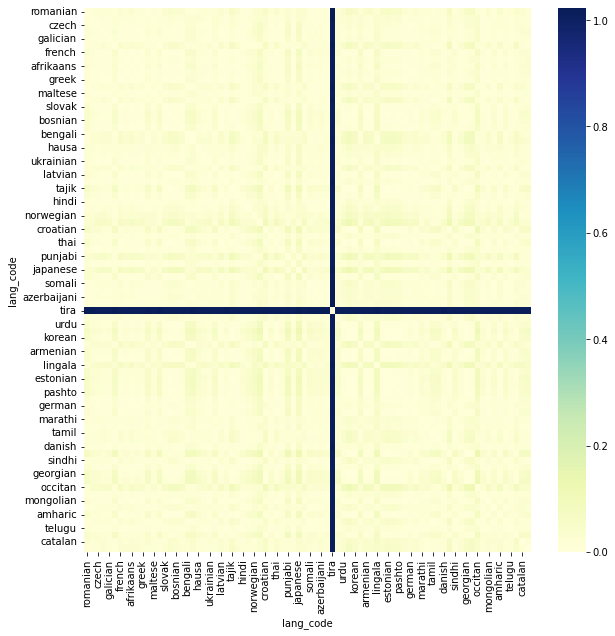

In [116]:
fig, ax = plt.subplots(figsize=(10,10))
seaborn.heatmap(dist_df, cmap='YlGnBu')